Progetto laboratorio di programmazione. Gruppo: Nicolò Cioni, Rossano Gilioli e Salvatore Russo. Dataset scelto : dataset n 1

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.metrics import *
test= pd.read_csv("/content/sample_data/1.test_convertito_numerici.csv", sep=",")
test_non = pd.read_csv("/content/sample_data/1.test_non_convertito.csv", sep=",")
train_non = pd.read_csv("/content/sample_data/1.train_non_convertito.csv", sep=",")
train = pd.read_csv("/content/sample_data/1.train_convertito_numerici.csv", sep=",")

Quante righe e colonne sono presenti nei due dataset? I valori sono per lo più numerici o categorici e tra le righe sono poi presenti valori nulli?

In [89]:
print("Train dataset info:")
train.describe()

Train dataset info:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,56707.000000,56707.000000,56707.000000,56707.0,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,...,56707.000000,56707.00000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000
mean,0.327420,0.358633,102.870369,2016.0,6.767313,28.458162,15.911104,0.893981,2.442802,1.850988,...,1.349075,0.22484,0.124429,71.445095,8.487435,3.833865,2.171302,98.325863,0.068334,0.548645
std,0.469276,0.479603,106.582358,0.0,3.194300,13.925493,8.784897,0.983110,1.863548,0.498133,...,1.887103,0.66649,0.337000,102.585427,47.550647,23.785668,0.477327,49.955696,0.253296,0.761173
min,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,2016.0,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.00000,0.000000,7.000000,-1.000000,0.000000,2.000000,68.530000,0.000000,0.000000
50%,0.000000,0.000000,68.000000,2016.0,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.00000,0.000000,9.000000,-1.000000,0.000000,2.000000,90.950000,0.000000,0.000000
75%,1.000000,1.000000,160.000000,2016.0,10.000000,41.000000,24.000000,2.000000,3.000000,2.000000,...,3.000000,0.00000,0.000000,134.000000,-1.000000,0.000000,2.000000,120.000000,0.000000,1.000000
max,1.000000,1.000000,709.000000,2016.0,12.000000,53.000000,31.000000,19.000000,50.000000,4.000000,...,11.000000,21.00000,2.000000,481.000000,499.000000,391.000000,3.000000,5400.000000,3.000000,5.000000


In [90]:
print("Test dataset info:")
test.describe()

Test dataset info:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,40687.000000,40687.000000,40687.000000,40687.0,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,...,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000
mean,0.323912,0.386979,109.259223,2017.0,4.709784,18.630373,15.717576,0.973308,2.601543,1.877995,...,1.386168,0.239438,0.102736,83.233047,12.665544,0.235186,2.109961,114.637950,0.054981,0.676506
std,0.467973,0.487065,107.940953,0.0,2.160014,9.422475,8.789609,1.014337,1.973291,0.496172,...,1.907991,0.683429,0.305795,116.963712,65.972486,4.458834,0.454108,52.256304,0.235894,0.846531
min,0.000000,0.000000,0.000000,2017.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.000000,23.000000,2017.0,3.000000,11.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,80.000000,0.000000,0.000000
50%,0.000000,0.000000,80.000000,2017.0,5.000000,19.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,107.100000,0.000000,0.000000
75%,1.000000,1.000000,164.500000,2017.0,7.000000,26.000000,23.000000,2.000000,3.000000,2.000000,...,3.000000,0.000000,0.000000,229.000000,-1.000000,0.000000,2.000000,140.000000,0.000000,1.000000
max,1.000000,1.000000,629.000000,2017.0,8.000000,35.000000,31.000000,16.000000,40.000000,4.000000,...,11.000000,18.000000,2.000000,535.000000,543.000000,223.000000,3.000000,510.000000,8.000000,5.000000


In [91]:
tot_train =  56707

In [92]:
tot_test= 40687

Nel "Train dataset" sono presenti 56707 righe mentre nel "Test Dataset" 40687. Le colonne sono 30 per entrambi. I valori sono perlopiù categorici (18/30), infatti,  molti dei valori segnati come "int" in realtà sono la conversione in numero di "Si" e "No"(es: "is_canceled") . In entrambi i dateset non sono presenti valori nulli. La media delle cancellazioni è del 36% nel train dataset e del 39% nel secondo.

Come si distribuisce il valore relativo al numero di persone? Quante prenotazioni includono bambini e quanti ospiti sono, invece,  da soli?

In [93]:
train["persone"] = train["babies"] + train["children"] + train["adults"]
print(train["persone"].mean())
test["persone"] = test["babies"] + test["children"] + test["adults"]
print(test["persone"].mean())

1.9633378595235156
2.0107405313736573


In [211]:
bambini_tr = train["babies"].value_counts()
print(bambini_tr)

0     56261
1       437
2         8
10        1
Name: babies, dtype: int64


In [210]:
bambini_te = test["babies"].value_counts()
print(bambini_te)

0    40429
1      253
2        5
Name: babies, dtype: int64


In [212]:
ragazzi_tr = train["children"].value_counts()
print(ragazzi_tr)

0.0    52578
1.0     2384
2.0     1711
3.0       34
Name: children, dtype: int64


In [213]:
ragazzi_te = test["children"].value_counts()
print(ragazzi_te)

0.0    37137
1.0     1999
2.0     1514
3.0       37
Name: children, dtype: int64


In [214]:
train["colonna_bambini"] = train["babies"] + train["children"]
bambini_rag_tr = train["colonna_bambini"].value_counts()
print(bambini_rag_tr)

0.0     52211
1.0      2678
2.0      1768
3.0        49
10.0        1
Name: colonna_bambini, dtype: int64


In [215]:
test["colonna_bambini"] = test["babies"] + test["children"]
bambini_rag_te = test["colonna_bambini"].value_counts()
print(bambini_rag_te)

0.0    36941
1.0     2136
2.0     1565
3.0       45
Name: colonna_bambini, dtype: int64


In [100]:
train.groupby(train["colonna_bambini"])["is_canceled"].mean()

colonna_bambini
0.0     0.360020
1.0     0.305078
2.0     0.400452
3.0     0.306122
10.0    0.000000
Name: is_canceled, dtype: float64

In [101]:
test.groupby(test["colonna_bambini"])["is_canceled"].mean()

colonna_bambini
0.0    0.385859
1.0    0.352060
2.0    0.466454
3.0    0.200000
Name: is_canceled, dtype: float64

In [217]:
persone_tr = train["persone"].value_counts().sort_index()
print(persone_tr)

0.0        84
1.0     10967
2.0     38563
3.0      5189
4.0      1852
5.0        51
12.0        1
Name: persone, dtype: int64


In [218]:
persone_te = test["persone"].value_counts().sort_index()
print(persone_te)

0.0       67
1.0     7181
2.0    27455
3.0     4282
4.0     1636
5.0       66
Name: persone, dtype: int64


In [104]:
train.groupby(train["persone"])["is_canceled"].mean()

persone
0.0     0.154762
1.0     0.301176
2.0     0.380468
3.0     0.305454
4.0     0.405508
5.0     0.254902
12.0    0.000000
Name: is_canceled, dtype: float64

In [105]:
test.groupby(test["persone"])["is_canceled"].mean()

persone
0.0    0.164179
1.0    0.290071
2.0    0.409033
3.0    0.380897
4.0    0.473105
5.0    0.242424
Name: is_canceled, dtype: float64

La media del numero di persone è di circa 2 persone in entrambi i dataset.
Il numero di prenotazioni composte da un numero qualsiasi di adulti con almeno un bambino ("babies" e/o "children") è relativamente basso in entrambi i dataset: poco meno di 4500 per il train e 3700 per il test . Il numero massimo di bambini è di 10 raggiunto però in un singolo caso. Escludendo quello il massimo di bambini a seguito è di 3. La media delle cancellazioni scende per le prenotazioni con solamente un bambini e torna a salire per le prenotazioni con 2 bambini a seguito (le prenotazioni con 3 bambini sono così poche da non essere rilevanti). Escludendo suddetto caso estremo il numero massimo di persone per una singola camera è 5, l'aumentare del numero di persone non aumenta la media delle cancellazioni in modo lineare (prenotazioni da 3 componenti cancellano in media meno che prenotazioni da 2 e da 4). In entrambi i dataset poi sono presenti valori anomali corrispondenti a 0 persone per camera (84 nel train e 67 nel test).
Il numero di viaggiatori "solitari" è invece cospicuo e simile in entrambi i dataset.
Il numero di adulti per prenotazione varia da un minomo di 1 fino a un massimo di 4.



Come si distrubuisce il numero delle prenotazioni nei mesi dell'anno e la media delle cancellazioni?

In [219]:
mesi_tr = train["arrival_date_month"].value_counts().sort_index()
print(mesi_tr)

1     2248
2     3891
3     4824
4     5428
5     5478
6     5292
7     4572
8     5063
9     5394
10    6203
11    4454
12    3860
Name: arrival_date_month, dtype: int64


In [220]:
mesi_te = test["arrival_date_month"].value_counts().sort_index()
print(mesi_te)

1    3681
2    4177
3    4970
4    5661
5    6313
6    5647
7    5313
8    4925
Name: arrival_date_month, dtype: int64


In [108]:
#media cancellazioni in base al mese di arrivo
train.groupby(train["arrival_date_month"])["is_canceled"].mean()

arrival_date_month
1     0.247776
2     0.343613
3     0.306177
4     0.379698
5     0.349580
6     0.396070
7     0.327865
8     0.360458
9     0.374861
10    0.405288
11    0.367310
12    0.362176
Name: is_canceled, dtype: float64

In [109]:
test.groupby(test["arrival_date_month"])["is_canceled"].mean()

arrival_date_month
1    0.339582
2    0.325353
3    0.336419
4    0.435082
5    0.437510
6    0.431911
7    0.373424
8    0.368731
Name: is_canceled, dtype: float64

I due dataset differiscono per il numero di mesi tenuti in considerazione: il testdataset, infatti, prende in considerazione soltanto i mesi da gennaio a agosto.
Il mese che ha riscontrato più prenotazioni nel traindataset è quello di ottobre, tuttavia le prenotazioni sembrano abbastanza equamente suddivise, fatta eccezione per gennaio dove si è riscontrato un valore notevolmente più basso in entrambi i dataset (anche se più marcato nel train). Nel test dataset si ha poi un aumento non trascurabile di prenotazioni nel mese di maggio, non presente invece nel train.
La media realtiva al numero di persone in ognuno dei mesi dell'anno è in linea con quella generale dei due dataset.
Quella delle cancellazioni invece risulta più altalentante con valori che si distanziano notevolmente dalla media generale (es: gennaio, nel train dataset, si distanzia di 11 punti percentuali).

Come si sono divisi i casi in base al segmento di mercaro? Come cambia la media relativa al numero di cancellazioni?

In [221]:
mercato_tr= train_non["market_segment"].value_counts().sort_index()
print(mercato_tr)

Aviation           127
Complementary      364
Corporate         2562
Direct            5663
Groups            7857
Offline TA/TO    12473
Online TA        27661
Name: market_segment, dtype: int64


In [222]:
mercato_te = test_non["market_segment"].value_counts().sort_index()
print(mercato_te)

Aviation           110
Complementary      214
Corporate         1562
Direct            4629
Groups            5854
Offline TA/TO     5667
Online TA        22651
Name: market_segment, dtype: int64


In [112]:
test_non.groupby(test_non["market_segment"])["is_canceled"].mean()

market_segment
Aviation         0.209091
Complementary    0.163551
Corporate        0.254802
Direct           0.154677
Groups           0.581141
Offline TA/TO    0.337745
Online TA        0.408680
Name: is_canceled, dtype: float64

In [113]:
train_non.groupby(train_non["market_segment"])["is_canceled"].mean()

market_segment
Aviation         0.228346
Complementary    0.129121
Corporate        0.146370
Direct           0.153099
Groups           0.617539
Offline TA/TO    0.347150
Online TA        0.355627
Name: is_canceled, dtype: float64

In [223]:
per_merc_tr = (mercato_tr/ len(train_non) * 100).sort_index()
print(per_merc_tr)

Aviation          0.223958
Complementary     0.641896
Corporate         4.517961
Direct            9.986421
Groups           13.855432
Offline TA/TO    21.995521
Online TA        48.778810
Name: market_segment, dtype: float64


In [224]:
per_merc_te= (mercato_te / len(test_non) * 100).sort_index()
print(per_merc_te)

Aviation          0.270357
Complementary     0.525967
Corporate         3.839064
Direct           11.377098
Groups           14.387888
Offline TA/TO    13.928282
Online TA        55.671345
Name: market_segment, dtype: float64


I valori relativi ai canali di distribuzione scelti dai visitatori sembrano più o meno simili nei due dataset fatta eccezione per il dato inerente alle prenotazioni avvenute offline tramite TA/TO (21% nel train e 13% nel test) .
"Aviation" e "complementary" hanno un numero di casi estremamente più basso (neanche l'1%) mentre le prenotazioni presso agenzie online rappresentano circa la metà dei casi in entrambi i datset.
La media delle cancellazioni è quasi raddoppiata per quanto riguarda i gruppi mentre è dimezzata per chi prenota direttamente.

Come si distribuisce il valore delle prenotazioni precedenti (cancellate e non) e come aver già prenotato presso l'hotel cambia la media delle cancellazioni? C'è differenza tra avere già avuto una prenotazione non cancellata e una cancellazione?

In [226]:
cancellazioni_tr = train["previous_cancellations"].value_counts().sort_index()
print(cancellazioni_tr)

0     54936
1      1595
2        48
3        51
4        12
5        13
6         7
11       33
13       12
Name: previous_cancellations, dtype: int64


In [227]:
cancellazioni_te = test["previous_cancellations"].value_counts()
print(cancellazioni_te)

0    40409
1      195
2       37
4       19
6       15
3        6
5        6
Name: previous_cancellations, dtype: int64


In [228]:
non_cancellazioni_tr = train["previous_bookings_not_canceled"].value_counts().sort_index()
print(non_cancellazioni_tr)

0     54827
1       777
2       289
3       183
4       138
5       110
6        62
7        43
8        36
9        27
10       22
11       18
12       15
13       10
14       11
15       11
16       10
17        9
18        9
19        8
20        9
21        9
22        9
23        4
24        4
25       11
26        2
27        4
28        3
29        3
30        2
31        2
32        2
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        2
45        1
46        1
47        1
48        2
49        1
50        1
51        1
52        1
53        1
54        1
55        1
56        1
57        1
58        1
Name: previous_bookings_not_canceled, dtype: int64


In [229]:
non_cancellazioni_te = test["previous_bookings_not_canceled"].value_counts().sort_index()
print(non_cancellazioni_te)

0     39259
1       590
2       231
3       122
4        80
5        60
6        46
7        39
8        30
9        30
10       29
11       23
12       21
13       19
14       16
15       10
16       10
17        7
18        5
19        5
20        3
21        3
22        1
23        3
24        5
25        6
26        5
27        5
28        4
29        3
30        2
58        1
59        1
60        1
61        1
62        1
63        1
64        1
65        1
66        1
67        1
68        1
69        1
70        1
71        1
72        1
Name: previous_bookings_not_canceled, dtype: int64


In [230]:
train["prenotazioni_precedenti"] = train["previous_bookings_not_canceled"] + train["previous_cancellations"]
prenotazioni_tr = train["prenotazioni_precedenti"].value_counts().sort_index()
print(prenotazioni_tr)

0     53380
1      2162
2       302
3       179
4       125
5       102
6        77
7        53
8        43
9        30
10       23
11       20
12       18
13        9
14       22
15       16
16       14
17        9
18        9
19        8
20        8
21       10
22        8
23        7
24        4
25        5
26        4
27        3
28        2
29        3
30        4
31        3
32        3
33        4
34        1
35        1
36        9
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        1
45        1
46        1
47        1
48        1
49        1
50        1
51        1
53        2
54        1
55        1
56        1
57        1
58        1
59        1
60        1
61        1
62        1
64        1
Name: prenotazioni_precedenti, dtype: int64


In [231]:
test["prenotazioni_precedenti"] = test["previous_bookings_not_canceled"] + test["previous_cancellations"]
prenotazioni_te = test["prenotazioni_precedenti"].value_counts().sort_index()
print(prenotazioni_te)

0     39253
1       570
2       236
3       122
4        89
5        58
6        47
7        31
8        32
9        31
10       26
11       23
12       21
13       18
14       18
15       15
16       14
17       10
18        5
19        5
20        5
21        3
22        2
23        3
24        5
25        6
26        4
27        5
28        4
29        3
30        3
31        2
32        1
33        1
34        1
64        1
65        1
66        1
67        1
68        1
69        1
70        1
71        1
72        1
73        1
74        1
75        1
76        1
77        1
78        1
Name: prenotazioni_precedenti, dtype: int64


In [120]:
train.groupby(train["previous_bookings_not_canceled"])["is_canceled"].mean()

previous_bookings_not_canceled
0     0.368924
1     0.055341
2     0.038062
3     0.043716
4     0.072464
5     0.081818
6     0.048387
7     0.023256
8     0.055556
9     0.000000
10    0.136364
11    0.111111
12    0.200000
13    0.000000
14    0.000000
15    0.181818
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.727273
26    0.000000
27    0.250000
28    0.000000
29    0.333333
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.500000
45    0.000000
46    0.000000
47    0.000000
48    0.500000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    1.000000
Name: is_canceled, dtype: float64

In [121]:
test.groupby(test["previous_bookings_not_canceled"])["is_canceled"].mean()

previous_bookings_not_canceled
0     0.399272
1     0.049153
2     0.060606
3     0.040984
4     0.025000
5     0.016667
6     0.000000
7     0.076923
8     0.033333
9     0.000000
10    0.137931
11    0.130435
12    0.000000
13    0.105263
14    0.125000
15    0.000000
16    0.100000
17    0.142857
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.200000
27    0.200000
28    0.000000
29    0.000000
30    0.000000
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
63    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
Name: is_canceled, dtype: float64

In [122]:
train.groupby(train["previous_cancellations"])["is_canceled"].mean()

previous_cancellations
0     0.342799
1     0.909718
2     0.312500
3     0.196078
4     0.083333
5     0.153846
6     1.000000
11    0.242424
13    0.916667
Name: is_canceled, dtype: float64

In [123]:
test.groupby(test["previous_cancellations"])["is_canceled"].mean()

previous_cancellations
0    0.388453
1    0.174359
2    0.162162
3    0.333333
4    0.315789
5    0.000000
6    0.000000
Name: is_canceled, dtype: float64

In [124]:
train.groupby(train["prenotazioni_precedenti"])["is_canceled"].mean()

prenotazioni_precedenti
0     0.352154
1     0.663275
2     0.076159
3     0.039106
4     0.056000
5     0.078431
6     0.220779
7     0.094340
8     0.046512
9     0.033333
10    0.086957
11    0.050000
12    0.222222
13    0.000000
14    0.545455
15    0.125000
16    0.000000
17    0.000000
18    0.111111
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.333333
30    0.250000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.888889
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    1.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
53    0.500000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
64    1.000000
Name: is_canceled, dtype: float

In [125]:
test.groupby(test["prenotazioni_precedenti"])["is_canceled"].mean()

prenotazioni_precedenti
0     0.399256
1     0.024561
2     0.093220
3     0.073770
4     0.067416
5     0.051724
6     0.000000
7     0.032258
8     0.031250
9     0.032258
10    0.076923
11    0.130435
12    0.000000
13    0.000000
14    0.055556
15    0.200000
16    0.214286
17    0.100000
18    0.000000
19    0.000000
20    0.000000
21    0.333333
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.200000
28    0.000000
29    0.000000
30    0.333333
31    0.000000
32    0.000000
33    0.000000
34    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    0.000000
76    0.000000
77    0.000000
78    0.000000
Name: is_canceled, dtype: float64

Il numero di persone che hanno almeno una prenotazione non cancellata presso l'hotel è abbastanza omogeneo nei due dataset. Anche quello inerente al numero di cancellazioni è equilibrato fatta eccezione per quello relativo alle persone con una cancellazione precedente che riscontra un valore anomalo, in quanto nel train è superiore di 10 volte rispetto al test, in più la media di cancellazioni, nel train, di chi aveva già una cancellazione precedente risulta estremamente alta (90% circa). In generale avere già una prenotazione precedente diminuisce di molto la media delle cancellazioni, questo è più evidente per chi aveva una prenotazione non cancellata.

Controllare la distribuzione in base al tipo di hotel selezionato

Controllare la distribuzione in base ai giorni in attesa

In [232]:
attesa_tr = train["days_in_waiting_list"].value_counts().sort_index()
print(attesa_tr)

0      53958
1          8
2          3
3         59
4         20
       ...  
236       35
259       10
330       15
379       15
391       45
Name: days_in_waiting_list, Length: 94, dtype: int64


In [127]:
waiting_people = tot_train - 53958
print(waiting_people)

2749


In [233]:
attesa_te = test["days_in_waiting_list"].value_counts().sort_index()
print(attesa_te)

0      40487
1          4
2          2
4          5
5          6
       ...  
165        1
175        1
183        1
185        2
223        1
Name: days_in_waiting_list, Length: 76, dtype: int64


In [129]:
waiting_people_test = tot_test - 40487
print(waiting_people_test)

200


I due dataset differiscono molto nei valori relativi alle persone che sono rimaste in lista d'attesa, difatti, nel train dataset abbiamo 2750 persone con valori che vanno da 0 a 391 giorni in lista d'attesa, nel secondo, invece, i casi scendono a 200 con valori da 0 a 223.

Controllare i valori in base al tipo di stanza prenotata e il tipo di stanza assegnata e come influisce il cambio nelle cancellazioni.

controllare la distribuzione in base al "customer Type". (fino a qui Salvo)

Controllare la distribuzione dei dati in base alla durata del soggiorno (fare una colonna "days" (weekend + week))

In [235]:
weekend_tr = train["stays_in_weekend_nights"].value_counts().sort_index()
print(weekend_tr)

0     25340
1     14987
2     14807
3       602
4       818
5        44
6        59
7         7
8        29
9         6
10        2
12        2
14        2
16        1
19        1
Name: stays_in_weekend_nights, dtype: int64


In [236]:
weekend_te = test["stays_in_weekend_nights"].value_counts().sort_index()
print(weekend_te)

0     16885
1     10433
2     12138
3       408
4       689
5        15
6        81
7         2
8        23
9         1
10        5
12        3
13        2
16        2
Name: stays_in_weekend_nights, dtype: int64


In [237]:
week_tr=train["stays_in_week_nights"].value_counts().sort_index()
print(week_tr)

0      3978
1     14464
2     16209
3     10651
4      4376
5      4901
6       640
7       455
8       289
9        97
10      487
11       27
12       15
13       12
14       11
15       37
16        3
17        3
18        5
19        4
20       22
21        8
22        3
24        1
25        3
30        2
34        1
35        1
41        1
50        1
Name: stays_in_week_nights, dtype: int64


In [239]:
week_te = test["stays_in_week_nights"].value_counts().sort_index()
print(week_te)

0      2452
1      9864
2     10535
3      8349
4      3587
5      4187
6       515
7       362
8       236
9        88
10      338
11       14
12       18
13        8
14       22
15       33
16        7
17        1
18        1
19       39
20       12
21        5
22        4
25        3
26        1
30        3
32        1
40        2
Name: stays_in_week_nights, dtype: int64


In [240]:
media_weekend_tr = train["stays_in_weekend_nights"].mean()
print(media_weekend_tr)

0.8939813426913785


In [241]:
media_weekend_te = test["stays_in_weekend_nights"].mean()
print(media_weekend_te)

0.9733084277533365


In [242]:
media_week_tr =train["stays_in_week_nights"].mean()
print(media_week_tr)

2.4428024758848115


In [243]:
media_week_te = test["stays_in_week_nights"].mean()
print(media_week_te)

2.601543490549807


In [244]:
per_week_tr = (week_tr / len(train) * 100).sort_index()
print(per_week_tr)

0      7.015007
1     25.506551
2     28.583773
3     18.782514
4      7.716860
5      8.642672
6      1.128608
7      0.802370
8      0.509637
9      0.171055
10     0.858801
11     0.047613
12     0.026452
13     0.021161
14     0.019398
15     0.065248
16     0.005290
17     0.005290
18     0.008817
19     0.007054
20     0.038796
21     0.014108
22     0.005290
24     0.001763
25     0.005290
30     0.003527
34     0.001763
35     0.001763
41     0.001763
50     0.001763
Name: stays_in_week_nights, dtype: float64


In [245]:
per_week_te = (week_te / len(test) * 100).sort_index()
print(per_week_te)

0      6.026495
1     24.243616
2     25.892791
3     20.520068
4      8.816084
5     10.290756
6      1.265761
7      0.889719
8      0.580038
9      0.216285
10     0.830732
11     0.034409
12     0.044240
13     0.019662
14     0.054071
15     0.081107
16     0.017205
17     0.002458
18     0.002458
19     0.095854
20     0.029493
21     0.012289
22     0.009831
25     0.007373
26     0.002458
30     0.007373
32     0.002458
40     0.004916
Name: stays_in_week_nights, dtype: float64


In [246]:
train["giorni_totali"] = train["stays_in_week_nights"] + train["stays_in_weekend_nights"]
giorni_tr = train["giorni_totali"].value_counts().sort_index()
print(giorni_tr)

0       417
1     10803
2     12912
3     13119
4      7928
5      3672
6      1817
7      3711
8       507
9       389
10      494
11      169
12       94
13       54
14      435
15       46
16       12
17       11
18        8
19        7
20       10
21       34
22        3
23        2
24        4
25        1
26        5
27        1
28       19
29        8
30        5
33        1
34        1
35        2
42        2
48        1
49        1
57        1
69        1
Name: giorni_totali, dtype: int64


In [247]:
test["giorni_totali"] = test["stays_in_week_nights"] + test["stays_in_weekend_nights"]
giorni_te=test["giorni_totali"].value_counts().sort_index()
print(giorni_te)

0      144
1     6764
2     8159
3     9681
4     6558
5     2862
6     1300
7     3370
8      380
9      280
10     421
11     155
12      82
13      37
14     314
15      16
16      17
17       5
18      23
19       7
20       1
21      32
22       5
23       1
24       2
25      36
26       1
27       3
28      10
29       4
30       7
35       3
38       1
42       2
43       1
45       1
56       2
Name: giorni_totali, dtype: int64


Rispondere alla domanda. valori anomali 0 giorni totali

Controllare la distribuzione di dati in base al tipo di prenotazione e pasti prenotati (b&b etc.)

In [248]:
room_type_tr = train_non["reserved_room_type"].value_counts().sort_index()
print(room_type_tr)

A    40718
B      672
C      282
D     9421
E     2881
F     1424
G      997
H      306
P        6
Name: reserved_room_type, dtype: int64


In [249]:
room_type_te=test_non["reserved_room_type"].value_counts().sort_index()
print(room_type_te)

A    27556
B      202
C      479
D     7594
E     2701
F     1099
G      837
H      213
P        6
Name: reserved_room_type, dtype: int64


In [250]:
room_assigned_tr = train_non["assigned_room_type"].value_counts().sort_index()
print(room_assigned_tr)

A    34690
B     1346
C      984
D    12403
E     3574
F     1799
G     1210
H      339
I      215
K      141
P        6
Name: assigned_room_type, dtype: int64


In [251]:
room_assigned_te=test_non["assigned_room_type"].value_counts().sort_index()
print(room_assigned_te)

A    24922
B      304
C      913
D     8903
E     2900
F     1320
G      960
H      247
I      103
K      109
P        6
Name: assigned_room_type, dtype: int64


In [253]:
per_room_tr = (room_type_tr / len(train) * 100).sort_index()
print(per_room_tr)

A    71.804186
B     1.185039
C     0.497293
D    16.613469
E     5.080502
F     2.511154
G     1.758160
H     0.539616
P     0.010581
Name: reserved_room_type, dtype: float64


In [254]:
per_room_te = (room_type_te / len(test) * 100).sort_index()
print(per_room_te)

A    67.726792
B     0.496473
C     1.177280
D    18.664438
E     6.638484
F     2.701108
G     2.057168
H     0.523509
P     0.014747
Name: reserved_room_type, dtype: float64


In [255]:
per_assigned_tr = (room_assigned_tr / len(train) * 100).sort_index()
print(per_assigned_tr)

A    61.174105
B     2.373605
C     1.735236
D    21.872079
E     6.302573
F     3.172448
G     2.133775
H     0.597810
I     0.379142
K     0.248647
P     0.010581
Name: assigned_room_type, dtype: float64


In [256]:
per_assigned_te = (room_assigned_te / len(test) * 100).sort_index()
print(per_assigned_te)

A    61.252980
B     0.747167
C     2.243960
D    21.881682
E     7.127584
F     3.244279
G     2.359476
H     0.607074
I     0.253152
K     0.267899
P     0.014747
Name: assigned_room_type, dtype: float64


In [257]:
pasti_tr = train_non["meal"].value_counts().sort_index()
print(pasti_tr)

BB           44551
FB             334
HB            6176
SC            5060
Undefined      586
Name: meal, dtype: int64


In [258]:
pasti_te =test_non["meal"].value_counts().sort_index()
print(pasti_te)

BB           30524
FB              95
HB            4477
SC            5178
Undefined      413
Name: meal, dtype: int64


In [259]:
per_pasti_tr= (pasti_tr / len(train_non) * 100).sort_index()
print(per_pasti_tr)

BB           78.563493
FB            0.588993
HB           10.891072
SC            8.923061
Undefined     1.033382
Name: meal, dtype: float64


In [260]:
per_pasti_te = (pasti_te / len(test_non) * 100).sort_index()
print(per_pasti_te)

BB           75.021506
FB            0.233490
HB           11.003515
SC           12.726424
Undefined     1.015066
Name: meal, dtype: float64


In [198]:
train_non.groupby(train_non["meal"])["is_canceled"].mean()

meal
BB           0.362304
FB           0.601796
HB           0.311528
SC           0.374111
Undefined    0.303754
Name: is_canceled, dtype: float64

In [199]:
test_non.groupby(test_non["meal"])["is_canceled"].mean()

meal
BB           0.395918
FB           0.389474
HB           0.334152
SC           0.393588
Undefined    0.215496
Name: is_canceled, dtype: float64

Si segnala un valore alquanto elevato, rispetto al resto dei casi, nell'assegnazione di tipo "0" (più del 60% in entrambi i dataset). Per quanto riguarda il tipo di pasto invece i valori si concentrano per la maggior parte (più del 75%) nell'etichetta "B&B". Sempre per il caso pasti, notiamo una notevole riduzione delle cancellazioni nei casi di "FB" (full board: pensione completa). Nel caso "room type" vediamo un valore molto basso (6 unità) nell'ultima tipologia di stanza, della quale però possiamo solo ipotizzare la reale tipologia. Riguardare

Controllare il numero di cancellazioni in base al deposito fatto oppure no (deposit_type)

In [204]:
depositi_tr = train_non["deposit_type"].value_counts()
print(depositi_tr)

No Deposit    49782
Non Refund     6794
Refundable      131
Name: deposit_type, dtype: int64


In [205]:
depositi_te= test_non["deposit_type"].value_counts()
print(depositi_te)

No Deposit    36534
Non Refund     4126
Refundable       27
Name: deposit_type, dtype: int64


In [261]:
per_dep_tr = (depositi_tr / len(train_non) * 100).sort_index()
print(per_dep_tr)

No Deposit    87.788104
Non Refund    11.980884
Refundable     0.231012
Name: deposit_type, dtype: float64


In [262]:
per_dep_te = (depositi_te / len(test_non) * 100).sort_index()
print(per_dep_te)

No Deposit    89.792809
Non Refund    10.140831
Refundable     0.066360
Name: deposit_type, dtype: float64


In [269]:
train_non.groupby(train_non["deposit_type"])["is_canceled"].mean()

deposit_type
No Deposit    0.273372
Non Refund    0.988814
Refundable    0.076336
Name: is_canceled, dtype: float64

In [267]:
test_non.groupby(test_non["deposit_type"])["is_canceled"].mean()

deposit_type
No Deposit    0.317540
Non Refund    0.998061
Refundable    0.962963
Name: is_canceled, dtype: float64

Sembra abbastanza evidente (come era lecito aspettarsi) una molto maggiore quantità di cancellazioni nei casi in cui non viene lasciato alcun deposito. Il dato che ci sembra invece più significativo è l'elevato numero di cancellazioni nei casi "non refund", rispetto ai relativamente pochi casi "refundable". Questo è senz'altro dovuto al numero molto maggiore di prenotazioni "non refund", dettate dalla maggiore convenienza economica. riguardare

Controllare la distribuzione di chi ha richiesto un parcheggio e chi no

Seconda parte: esplorazione dati.

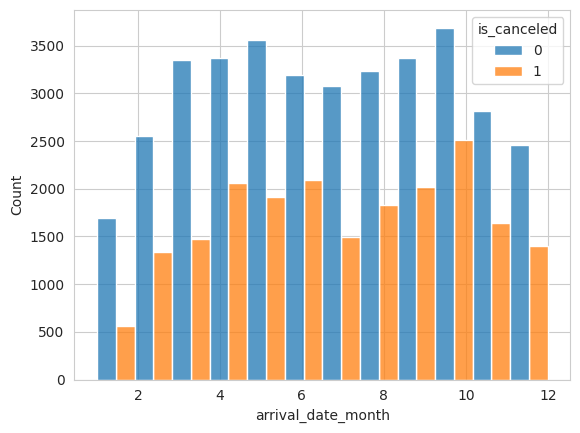

In [130]:
#mese di arrivo e cancellazioni
sns.set_style("whitegrid")
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "dodge", data=train, bins = 12)
plt.show()

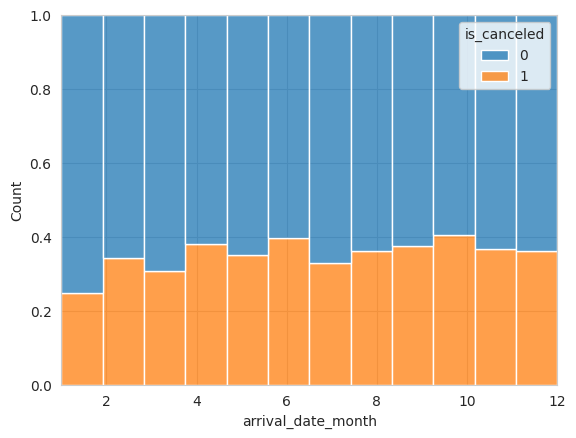

In [131]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "fill", stat = "count", data=train, bins =12)
plt.show()

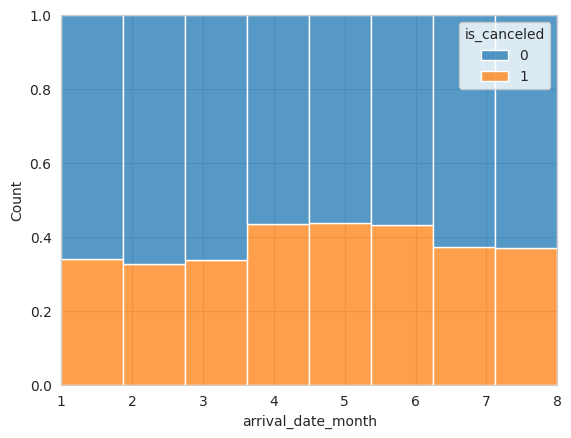

In [132]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "fill", stat = "count", data=test, bins =8)
plt.show()

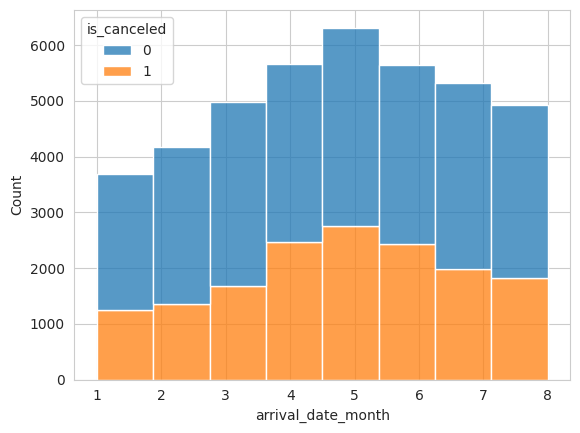

In [133]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "stack", stat = "count", data=test, bins =8)
plt.show()

Come abbiamo visto in precedenza i due dataset differiscono nel numero di mesi riportati (12 per il train e 8 per il test). Il numero di prenotazioni cresce in entrambi i dataset dal mese di gennaio (mese con il numero di prenotazioni più basso) fino a maggio per poi scendere nuovamente fino a luglio per poi risalire da agosto (dove però il test dataset si ferma) e riscendere da ottobre. Le percentuali di prenotazioni tendono ad essere, invece, abbastanza variabili tra i due dataset, in generale non sembra esserci una correlazione tra il mese e la crescita della media dele cancellazioni.

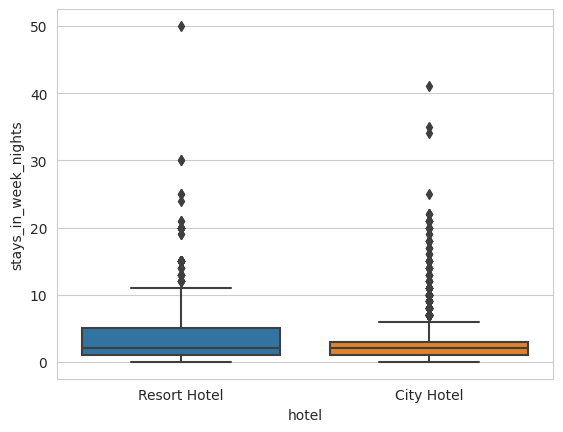

In [134]:
#tipo di pasto in base ai
sns.boxplot( x= "hotel" , y="stays_in_week_nights", data=train_non)
plt.show()

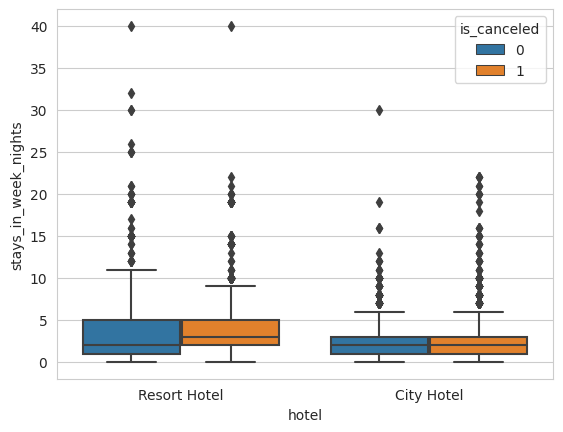

In [135]:
sns.boxplot(x="hotel", y="stays_in_week_nights", hue = "is_canceled", data=test_non)
plt.show()

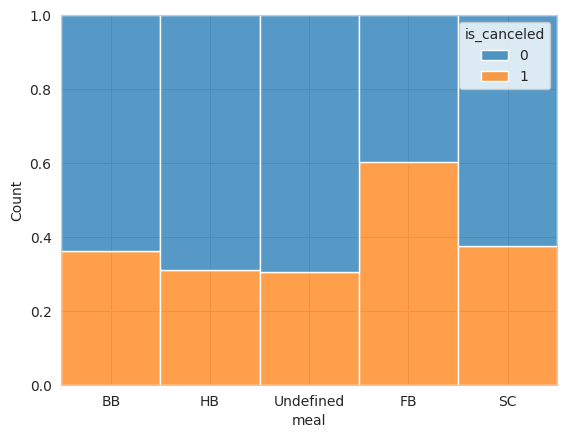

In [136]:
#tipo di pasto e cancellazioni
sns.histplot(x="meal", hue = "is_canceled", multiple = "fill", stat = "count", data=train_non, bins =8)
plt.show()

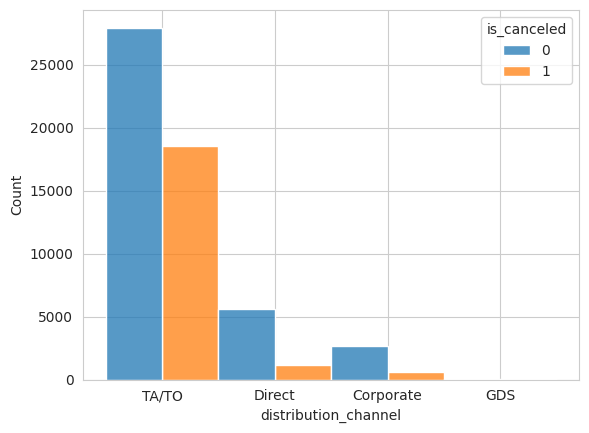

In [137]:
#canale di distribuzione e cancellazioni
sns.histplot(x="distribution_channel", hue = "is_canceled", multiple = "dodge", stat = "count", data=train_non, bins =8)
plt.show()

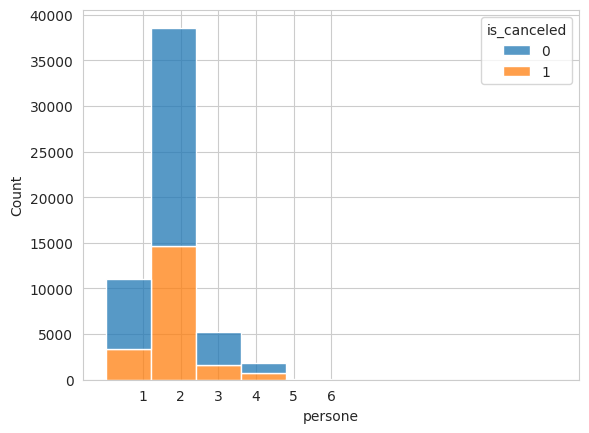

In [138]:
#cancellazioni in base alle persone
sns.histplot(x="persone", hue="is_canceled", multiple="stack", stat="count", data=train, bins = 10)
plt.xticks([1, 2, 3, 4, 5, 6])
plt.show()

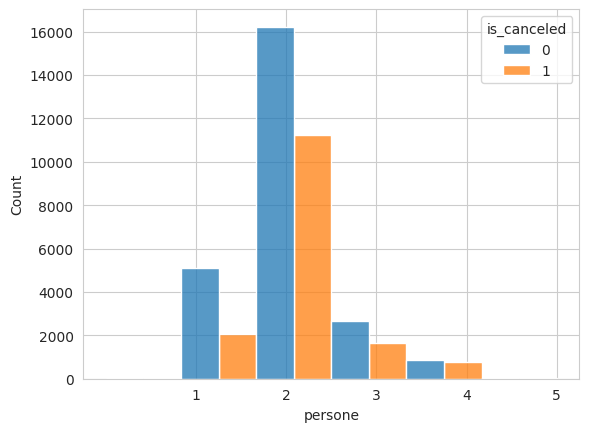

In [139]:
#persone e cancellazioni
sns.histplot(x="persone", hue = "is_canceled", multiple = "dodge", stat = "count", data=test, bins = 6)
plt.xticks([1, 2, 3, 4, 5])
plt.show()

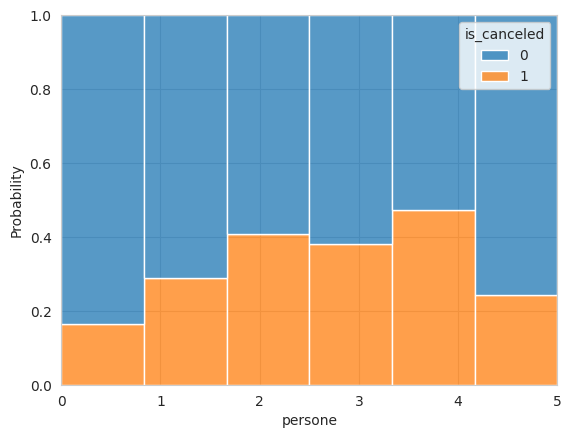

In [140]:
sns.histplot(x="persone", hue = "is_canceled", multiple = "fill", stat = "probability", data=test, bins = 6)
plt.show()

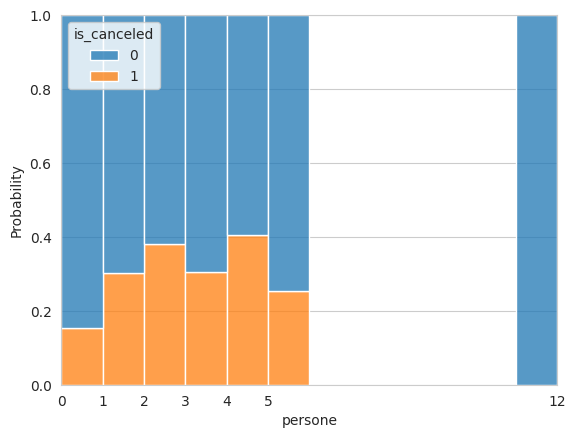

In [141]:
sns.histplot(x="persone", hue = "is_canceled", multiple = "fill", stat = "probability", data=train, bins = 12)
plt.xticks([0, 1, 2, 3, 4, 5, 12])
plt.show()
#togliere il valore 12

Dai grafici si evince molto chiaramente come la stragrande maggioranza delle prenotazioni sia per due persone. La percentuale di cancellazioni si alza notevolemente in corrispondenza di tale dato. Anche le prenotazioni da 4 persone, nonostante i casi siano di molto inferiori presenta una percentuale di cancellazioni molto alta

In [142]:
#sns.swarmplot(x="is_repeated_guest", y="stays_in_week_nights", hue="is_canceled", size=2, data=train)
#plt.show()

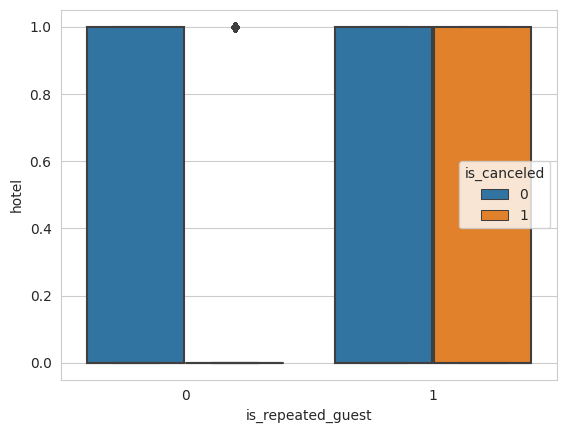

In [143]:
sns.boxplot(x="is_repeated_guest", y= "hotel", hue = "is_canceled", data=train)
plt.show()

Fase 3 Machine learning

In [144]:
train.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
count,56707.000000,56707.000000,56707.000000,56707.0,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,...,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000
mean,0.327420,0.358633,102.870369,2016.0,6.767313,28.458162,15.911104,0.893981,2.442802,1.850988,...,71.445095,8.487435,3.833865,2.171302,98.325863,0.068334,0.548645,1.963338,0.112349,0.197930
std,0.469276,0.479603,106.582358,0.0,3.194300,13.925493,8.784897,0.983110,1.863548,0.498133,...,102.585427,47.550647,23.785668,0.477327,49.955696,0.253296,0.761173,0.655733,0.410922,1.749266
min,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,2016.0,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,...,7.000000,-1.000000,0.000000,2.000000,68.530000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,68.000000,2016.0,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,9.000000,-1.000000,0.000000,2.000000,90.950000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,1.000000,1.000000,160.000000,2016.0,10.000000,41.000000,24.000000,2.000000,3.000000,2.000000,...,134.000000,-1.000000,0.000000,2.000000,120.000000,0.000000,1.000000,2.000000,0.000000,0.000000
max,1.000000,1.000000,709.000000,2016.0,12.000000,53.000000,31.000000,19.000000,50.000000,4.000000,...,481.000000,499.000000,391.000000,3.000000,5400.000000,3.000000,5.000000,12.000000,10.000000,64.000000


In [145]:
print(test.isnull().sum())
print(train.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         